In [ ]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess


In [58]:
img_path = "D:/AIML/data/flower_photos/sunflower.jpg"  # ◄ change this

In [ ]:
# Cell 2: Load your trained model
# (Update the path if you saved it elsewhere)
model = tf.keras.models.load_model("D:/AIML/data/resnet50_flowers_best.h5")
model.summary()


Model: "resnet50_flowers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 180, 180, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 gap (GlobalAveragePooling2  (None, 2048)              0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 predictions (Dense)         (None, 5)                 10245     
                                                                 
Total params: 23597957 (90.02 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 23587712 (89.98 MB)
_____

In [60]:
# Cell 3: Define your class names
# Make sure this matches the order you trained on:
class_names = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]


In [61]:
# Cell 4: Helper to load & preprocess a single image
IMG_SIZE = (180, 180)

def load_and_prep_resnet(img_path):
    # 1) Load & resize
    img = load_img(img_path, target_size=IMG_SIZE)
    # 2) To array (shape: H×W×3), dtype=float32, range [0–255]
    arr = img_to_array(img)
    # 3) ResNet50 preprocessing (BGR + mean subtraction + scaling)
    arr = resnet_preprocess(arr)
    # 4) Add batch dim → (1, H, W, 3)
    return np.expand_dims(arr, axis=0), img


In [62]:
# Cell 6: Run inference and visualize
input_tensor, orig_img = load_and_prep_resnet(img_path)

# Model prediction
probs    = model.predict(input_tensor)[0]
pred_idx = np.argmax(probs)
confidence = probs[pred_idx]
pred_class = class_names[pred_idx]

1/1 [==============================] - 1s 1s/step


Predicted: sunflowers  (confidence 98.83%)


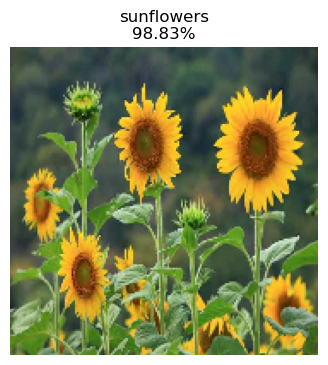

In [63]:
# Print and plot
print(f"Predicted: {pred_class}  (confidence {confidence:.2%})")
plt.figure(figsize=(4,4))
plt.imshow(orig_img)
plt.axis("off")
plt.title(f"{pred_class}\n{confidence:.2%}")
plt.show()